### Import libraries for experiments

In [2]:
from training_main import training_main, test
from utils import data_loading, normalization, filter_extraction

## Data Loading and Normalization

In [3]:
# LOAD DATA
train_data, train_labels, test_data, test_labels = data_loading("./data/train/", "./data/test/")
data = train_data + test_data

# NORMALIZATION
data_transform = normalization(data)

Red ch mean =  0.4186261033397197 
Green ch mean =  0.4149028207647793 
Blue ch mean =  0.3107424562795711
Red ch std =  0.2143839575234708 
Green ch std =  0.2012170089461628 
Blue ch std =  0.1989587122898516


## CNN Training

In [6]:
# TRAINING
model_CNN = training_main(data_transform, train_data, train_labels, 'CNN')

Folding done!
Device:  cuda


 20%|██        | 1/5 [00:06<00:26,  6.72s/it]

Epoch: 1 | train_loss: 0.7857 | train_acc: 0.3906 | val_loss: 0.6811 | val_acc: 0.7188


 40%|████      | 2/5 [00:11<00:17,  5.86s/it]

Epoch: 2 | train_loss: 0.6929 | train_acc: 0.5440 | val_loss: 0.6817 | val_acc: 0.7188


 60%|██████    | 3/5 [00:17<00:11,  5.54s/it]

Epoch: 3 | train_loss: 0.6916 | train_acc: 0.5440 | val_loss: 0.6812 | val_acc: 0.7188


 80%|████████  | 4/5 [00:22<00:05,  5.37s/it]

Epoch: 4 | train_loss: 0.6914 | train_acc: 0.5440 | val_loss: 0.6805 | val_acc: 0.7188


100%|██████████| 5/5 [00:27<00:00,  5.44s/it]


Epoch: 5 | train_loss: 0.6913 | train_acc: 0.5440 | val_loss: 0.6799 | val_acc: 0.7188
Total training time for split 0: 27.263 seconds
------------------------------------


 20%|██        | 1/5 [00:05<00:20,  5.21s/it]

Epoch: 1 | train_loss: 6.6979 | train_acc: 0.3679 | val_loss: 0.6596 | val_acc: 0.7188


 40%|████      | 2/5 [00:10<00:15,  5.13s/it]

Epoch: 2 | train_loss: 0.6883 | train_acc: 0.5440 | val_loss: 0.6543 | val_acc: 0.7188


In [ ]:
model_CNN

CNN_128x128(
  (conv1): Conv2d(3, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (drop1): Dropout1d(p=0.1, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (drop2): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=256, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)

In [26]:
# TESTING - to correct
# acc_CNN = test(data_transform, test_data, test_labels, model_CNN, 'CNN', device='cpu')
# print("Accuracy", acc_CNN)

## Extract Filters from CNN

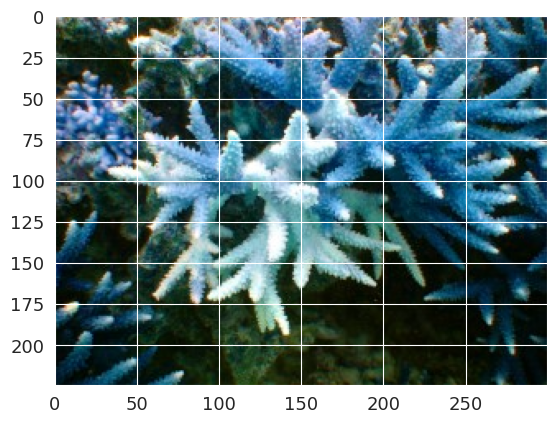

In [50]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import cv2
import json
from utils import plot_weights, visTensor
%matplotlib inline

image = cv2.imread('data/test/chihuahua/5101311705_3e5526d521_o.jpg')
plt.imshow(image)

In [51]:
model_weights =[]
conv_layers = []
model_children = list(model_CNN.children())

counter = 0
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
print(f"Total convolution layers: {counter}")

Total convolution layers: 4


In [52]:
# Load the model on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_CNN = model_CNN.to(device)

In [53]:
image = data_transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 128, 128])
Image shape after: torch.Size([1, 3, 128, 128])


In [54]:
# process the images through all the convolutional layers 
outputs = []
names = []
for layer in conv_layers[0:]:   
    image = layer(image)
    outputs.append(image) 
    names.append(str(layer))    
print(len(outputs))

# print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

4
torch.Size([1, 32, 120, 120])
torch.Size([1, 32, 112, 112])
torch.Size([1, 64, 108, 108])
torch.Size([1, 64, 104, 104])


In [55]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(120, 120)
(112, 112)
(108, 108)
(104, 104)


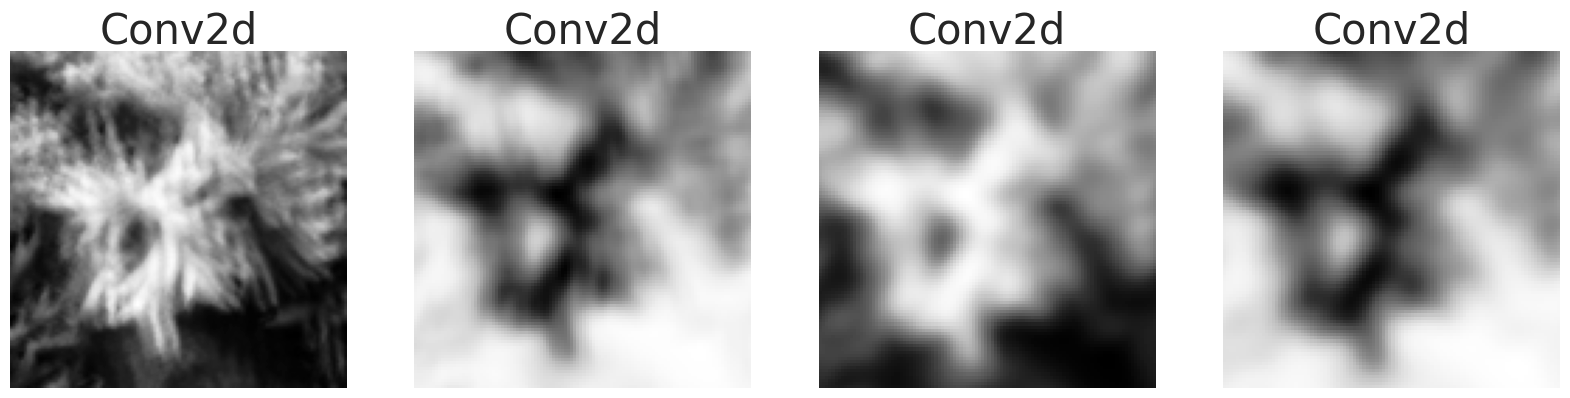

In [56]:
fig = plt.figure(figsize=(20, 40))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    imgplot = plt.imshow(processed[i],cmap='Greys')
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.show()

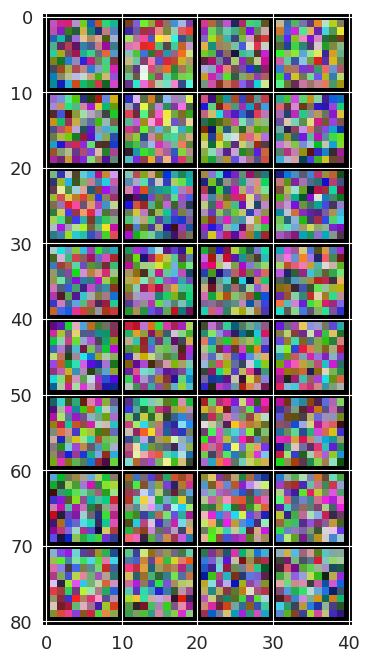

In [58]:
visTensor(model_weights[0], ch=0, allkernels=False)

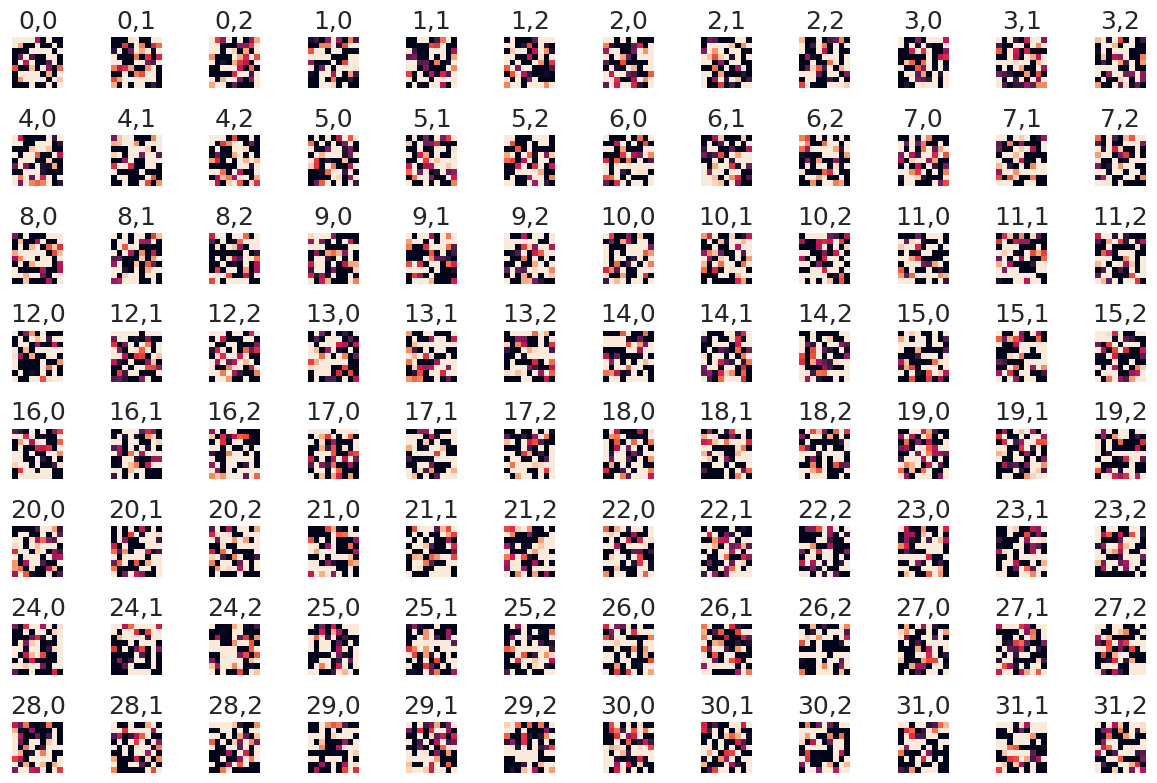

In [59]:
plot_weights(model_children[0], single_channel = True, collated = False)

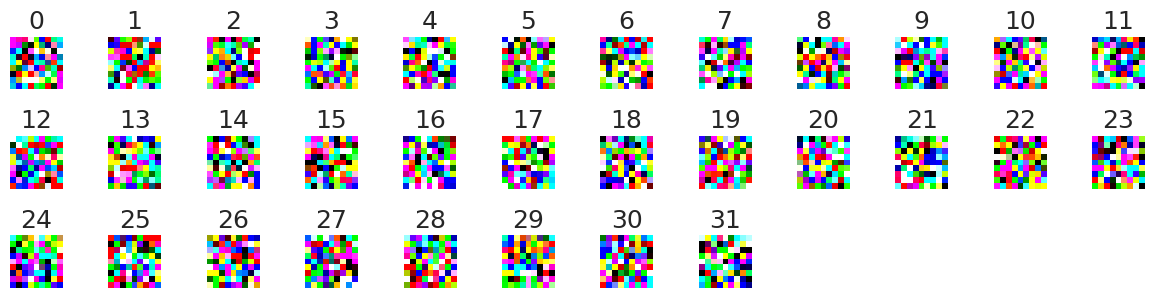

In [61]:
plot_weights(model_children[0], single_channel = False, collated = False)

## ScatNet Training

In [ ]:
# TRAINING
model_ScatNet = training_main(data_transform, train_data, train_labels, 'ScatNet')

# TESTING
acc_ScatNet = test(data_transform, test_data, test_labels, model_ScatNet, 'ScatNet', device='cpu')
print("Accuracy", acc_ScatNet)

## Extract Filters from ScatNet

In [ ]:
# EXTRACTION OF FILTERS
filter_extraction(model_ScatNet, data_transform, 'ScatNet')